In [45]:


import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.tri as tri
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 25
mpl.rcParams['font.family'] = 'Times New Roman' 
cmap = plt.cm.get_cmap('bwr')

import jax
from jax import random, device_put, vmap, vjp, jit, grad
import jax.numpy as np
import jax.numpy.linalg as linalg



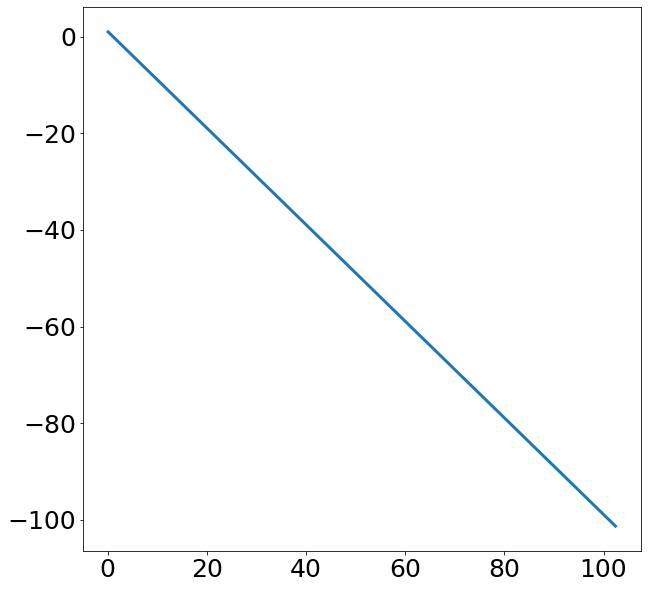

In [62]:



def Hqp_cycle(q, p):
    Uq = np.sum(np.square(q)/2)
    Kp = np.sum(np.square(p)/2)
    return Uq + Kp


def euler(Hqp, q, p, L, ϵ):
    
    dq_Hqp = grad(Hqp, argnums=0)
    dp_Hqp = grad(Hqp, argnums=1)
    
    qps = np.column_stack((q, p))
    for _ in range(L):
        q, p = (q + ϵ*dq_Hqp(q, p),
                p - ϵ*dq_Hqp(q, p))
        qp = np.column_stack((q, p))
        qps = np.vstack((qps, qp))
    
    return q, p, qps



ϵ = 2
L = 10
q = np.array([0.1])
p = np.array([1.])

_, _, qps = euler(Hqp_cycle, q, p, L, ϵ)

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(qps[:,0], qps[:,1])

    
    







(2, 2)